In [1]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
import statsmodels
import statsmodels.api as sm
import seaborn as sns

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [3]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
sns.set_context("paper", font_scale=1.5)

## Load MTTU for abandoned dataset

In [4]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "mttu.csv")
print (data_file)
df_mttu = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'out_of_date_duration', 'ratio', 'avg_total_duration', 'avg_out_of_date_duration', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'out_of_date_duration', 'ratio', 'dependents_approx']
rows = df_mttu.shape[0]
print (df_mttu.shape)
display(df_mttu.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/mttu.csv
(21670, 8)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,NPM,borc,16428,4828,0.293888,2346.857143,689.714286,0.293888
1,NPM,@ckeditor/ckeditor5-react,2203,0,0.000000,2203.000000,0.000000,0.000000
2,NPM,cozy-ical,22601,19397,0.858236,2260.100000,1939.700000,0.858236
3,NPM,gulp-filter,13380,3340,0.249626,1115.000000,278.333333,0.249626
4,NPM,gekko,10767,5940,0.551686,978.818182,540.000000,0.551686


In [5]:
df_mttu = df_mttu.dropna()

In [6]:
display(df_mttu[['system_name', 'avg_out_of_date_duration', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_out_of_date_duration                                     \
                               count        mean         std  min   25%   
system_name                                                               
NPM                          21670.0  640.016481  747.328022  0.0  43.5   

                                       avg_ratio                          \
               50%         75%     max     count      mean      std  min   
system_name                                                                
NPM          381.0  964.333333  4700.0   21670.0  0.312868  0.28056  0.0   

                                                
                  25%       50%       75%  max  
system_name                                     
NPM          0.044798  0.264906  0.499678  1.0

## Load MTTR for abandoned dataset

In [10]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "mttr.csv")
print (data_file)
df_mttr = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_mttr.shape[0]
print (df_mttr.shape)
display(df_mttr.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/mttr.csv
(4186, 8)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,NPM,pino-debug,650,79,0.121538,650.0,79.0,0.121538
1,NPM,cozy-ical,7098,2945,0.414906,3549.0,1472.5,0.414906
2,NPM,gekko,1063,128,0.120414,1063.0,128.0,0.120414
3,NPM,npm-audit-html,2193,1280,0.583675,2193.0,1280.0,0.583675
4,NPM,react-rater,2338,109,0.046621,2338.0,109.0,0.046621


In [11]:
df_mttr = df_mttr.dropna()

In [12]:
display(df_mttr[['system_name', 'avg_post_fix_exposure_time', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_post_fix_exposure_time                                     \
                                 count       mean         std  min    25%   
system_name                                                                 
NPM                             4186.0  761.06517  760.519793  1.0  128.0   

                                   avg_ratio                               \
               50%     75%     max     count      mean       std      min   
system_name                                                                 
NPM          497.0  1194.0  3671.0    4186.0  0.292227  0.259236  0.00024   

                                                
                  25%       50%       75%  max  
system_name                                     
NPM          0.064524  0.221125  0.465409  1.0

## Load abandoned dataset

In [13]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "widelyUsednpmPackages.csv")
print(data_file)
df_widely_used = pd.read_csv(data_file,
                             header=0,
                             sep=',',
                             on_bad_lines='skip')
print(df_widely_used.shape)
display(df_widely_used.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/widelyUsednpmPackages.csv
(28100, 9)


,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,gitbook-plugin-search-jieba,007pig/plugin-jieba,0,0,0.0,0,20807,0,4.0
1,path-format,00Davo/path-format,0,0,0.0,0,12955,0,0.0
2,yurnalist,0x80/yurnalist,0,0,0.0,0,1773192,0,90.0
3,@0x/mesh-rpc-client,0xProject/0x-mesh,0,0,0.0,0,13243,0,258.0
4,graphql-transform-federation,0xR/graphql-transform-federation,0,0,0.0,0,29640,0,220.0


## Join the dfs

In [14]:
# Join df_mttu and df_widely_used
df_mttu_joined = pd.merge(df_mttu, df_widely_used, left_on='from_package_name', right_on='npmPackageName', how='inner')
print(df_mttu_joined.shape)
display(df_mttu_joined.head())

# Join df_mttr and df_widely_used
df_mttr_joined = pd.merge(df_mttr, df_widely_used, left_on='from_package_name', right_on='npmPackageName', how='inner')
print(df_mttr_joined.shape)
display(df_mttr_joined.head())

(21670, 17)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,NPM,borc,16428,4828,0.293888,2346.857143,689.714286,0.293888,borc,dignifiedquire/borc,0,0,0.0,0,166051,0,29.0
1,NPM,@ckeditor/ckeditor5-react,2203,0,0.000000,2203.000000,0.000000,0.000000,@ckeditor/ckeditor5-react,ckeditor/ckeditor5-react,0,0,0.0,0,146091,0,407.0
2,NPM,cozy-ical,22601,19397,0.858236,2260.100000,1939.700000,0.858236,cozy-ical,cozy/cozy-ical,1,0,0.0,0,13258,1,29.0
3,NPM,gulp-filter,13380,3340,0.249626,1115.000000,278.333333,0.249626,gulp-filter,sindresorhus/gulp-filter,0,0,0.0,0,1036106,0,316.0
4,NPM,gekko,10767,5940,0.551686,978.818182,540.000000,0.551686,gekko,askmike/gekko,1,0,0.0,0,16229,1,10007.0


(4186, 17)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,NPM,pino-debug,650,79,0.121538,650.0,79.0,0.121538,pino-debug,pinojs/pino-debug,0,0,0.0,0,24555,0,141.0
1,NPM,cozy-ical,7098,2945,0.414906,3549.0,1472.5,0.414906,cozy-ical,cozy/cozy-ical,1,0,0.0,0,13258,1,29.0
2,NPM,gekko,1063,128,0.120414,1063.0,128.0,0.120414,gekko,askmike/gekko,1,0,0.0,0,16229,1,10007.0
3,NPM,npm-audit-html,2193,1280,0.583675,2193.0,1280.0,0.583675,npm-audit-html,eventOneHQ/npm-audit-html,0,0,0.0,0,32257,0,52.0
4,NPM,react-rater,2338,109,0.046621,2338.0,109.0,0.046621,react-rater,NdYAG/react-rater,0,0,0.0,0,24583,0,189.0


## Visualization

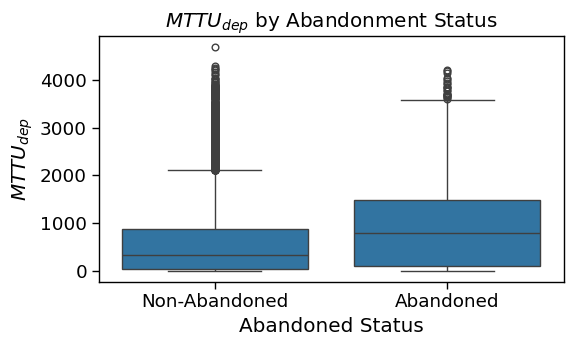

In [19]:
plt.figure(figsize=(6, 3.2))
sns.boxplot(data=df_mttu_joined, x='isAbandoned', y='avg_out_of_date_duration')
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTU_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTU_{dep}$')
plt.show()

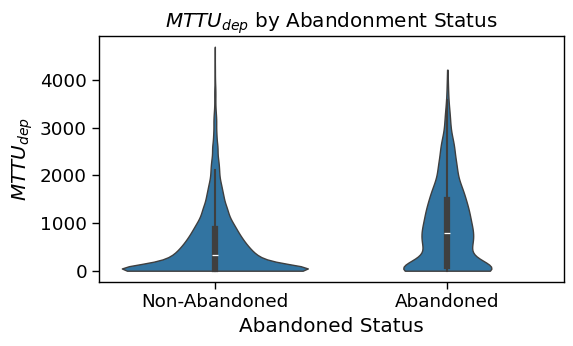

In [26]:
plt.figure(figsize=(6, 3.2))
sns.violinplot(data=df_mttu_joined, x='isAbandoned', y='avg_out_of_date_duration', cut=0)
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTU_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTU_{dep}$')
plt.savefig('../../results/abandoned/mttu_abandonment_status_violin.pdf', dpi=300, bbox_inches='tight')
plt.show()

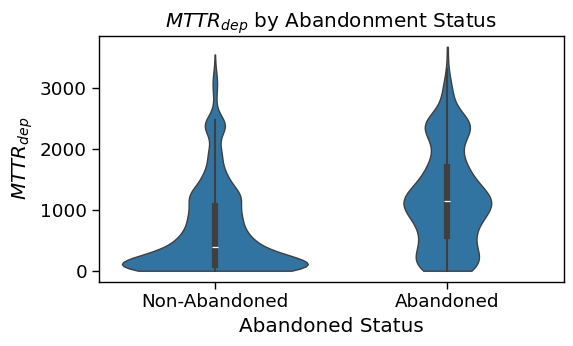

In [27]:
plt.figure(figsize=(6, 3.2))
sns.violinplot(data=df_mttr_joined, x='isAbandoned', y='avg_post_fix_exposure_time', cut=0)
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTR_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTR_{dep}$')
plt.savefig('../../results/abandoned/mttr_abandonment_status_violin.pdf', dpi=300, bbox_inches='tight')
plt.show()